<a href="https://colab.research.google.com/github/AI-odyssey/AI-odyssey.github.io/blob/master/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Dataset 가져오기

In [1]:
import pandas
import seaborn
seaborn.set()

In [3]:
from urllib.request import urlretrieve
URL = 'https://go.gwu.edu/engcomp6data3'
urlretrieve(URL, 'auto_mpg.csv')

('auto_mpg.csv', <http.client.HTTPMessage at 0x7f80ca4a3190>)

In [4]:
mpg_data = pandas.read_csv('/content/auto_mpg.csv')
mpg_data.head()

mpg  cylinders  displacement  ...  model year  origin                   car name
0  18.0          8         307.0  ...          70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70       1          buick skylark 320
2  18.0          8         318.0  ...          70       1         plymouth satellite
3  16.0          8         304.0  ...          70       1              amc rebel sst
4  17.0          8         302.0  ...          70       1                ford torino

[5 rows x 9 columns]

In [5]:
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 27.7+ KB


In [7]:
y_col = 'mpg'
x_cols = mpg_data.columns.drop(['car name', 'origin', 'mpg'])

print(x_cols)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year'],
      dtype='object')


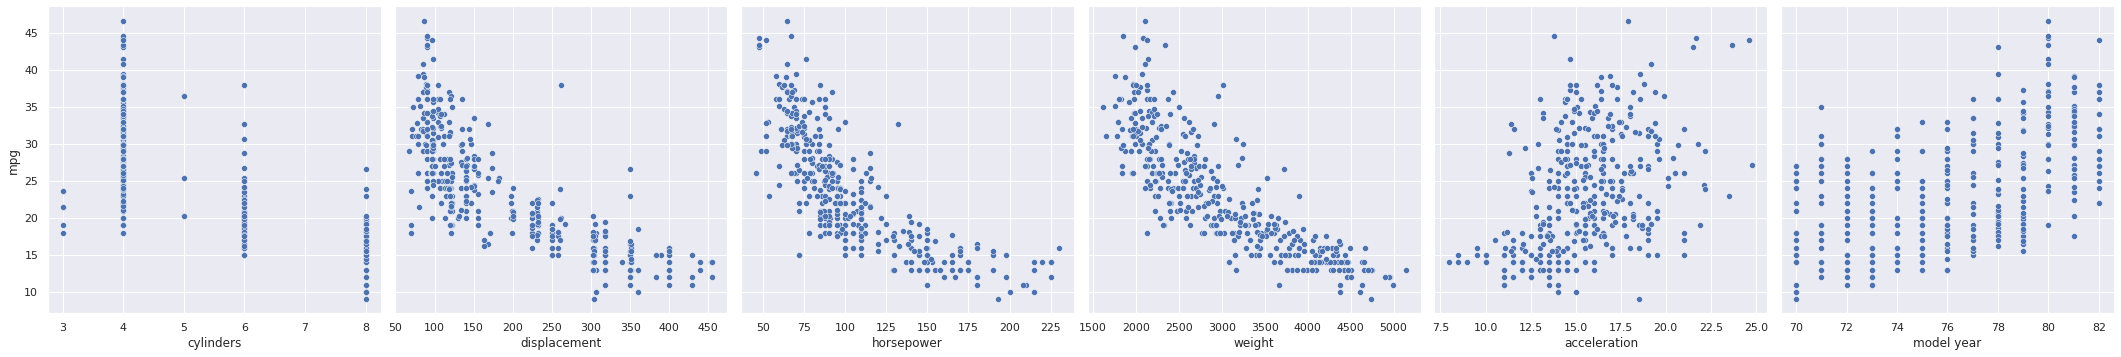

In [8]:
seaborn.pairplot(data=mpg_data, height=5, aspect=1, 
                 x_vars = x_cols,
                 y_vars = y_col);

In [10]:
from autograd import numpy
from autograd import grad

In [11]:
X = mpg_data[x_cols].values
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X))
y = mpg_data[y_col].values

print("X.shape = {}, y.shape = {}".format(X.shape, y.shape))

X.shape = (392, 7), y.shape = (392,)


In [12]:
def linear_regression(params, X):
  return numpy.dot(X, params)  # 벡터의 내적을 구하는 함수-> 선형회귀가 QᵀX꼴로 표현되니깐

def cost_function(params, model, X, y):
  y_pred = model(params, X)
  return numpy.mean(numpy.sum((y-y_pred)**2))

In [13]:
gradient = grad(cost_function)

In [14]:
max_iter = 30
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
  descent = gradient(params, linear_regression, X, y)
  params = params - descent * alpha
  loss = cost_function(params, linear_regression, X, y)
  if i%5 == 0:
    print(f"iterations {i}, loss = {loss}")

iterations 0, loss = 9.668521029386564e+18
iterations 5, loss = 5.933187473385046e+87
iterations 10, loss = 3.64096169342092e+156
iterations 15, loss = 2.2343136994110975e+225
iterations 20, loss = 1.3711096484197387e+294
iterations 25, loss = inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.7/dist-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


In [15]:
mpg_data[x_cols].describe().loc[['max', 'min']]

cylinders  displacement  horsepower  weight  acceleration  model year
max        8.0         455.0       230.0  5140.0          24.8        82.0
min        3.0          68.0        46.0  1613.0           8.0        70.0

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(mpg_data[x_cols])
X_scaled = numpy.hstack((numpy.ones((X_scaled.shape[0], 1)), X_scaled)) 

pandas.DataFrame(X_scaled).describe().loc[['max', 'min']]

0    1    2    3    4    5    6
max  1.0  1.0  1.0  1.0  1.0  1.0  1.0
min  1.0  0.0  0.0  0.0  0.0  0.0  0.0

In [19]:
max_iter = 1000
alpha = 0.001
params = numpy.zeros(X.shape[1])

for i in range(max_iter):
  descent = gradient(params, linear_regression, X_scaled, y)
  params = params - descent * alpha
  loss = cost_function(params, linear_regression, X_scaled, y)
  if i%100 == 0:
    print(f"iterations {i}, loss = {loss}")

iterations 0, loss = 116081.11124253299
iterations 100, loss = 5035.737208606848
iterations 200, loss = 4694.653830594688
iterations 300, loss = 4613.631473760375
iterations 400, loss = 4583.327630964672
iterations 500, loss = 4568.155268087917
iterations 600, loss = 4559.268593877387
iterations 700, loss = 4553.692765631068
iterations 800, loss = 4550.09985725416
iterations 900, loss = 4547.761957132873


In [20]:
params

array([ 27.56342896,  -1.24000064,   1.70706502,  -0.2853682 ,
       -23.08358717,   1.06664226,   8.99271696])

In [21]:
y_pred_gd = X_scaled @ params

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred_gd)
rsme = mean_squared_error(y, y_pred_gd, squared=False)
print(mae)
print(rsme)

2.613991601156043
3.40552056741184
